## DataFrame I
The dataframe is two-dimensional tabular data. It contains both columns and rows. 
Each column is the series we just described

In [2]:
import pandas as pd
import numpy as np

In [3]:
# create a dataframe from dictionary
data = {'name':['Pikachu', 'Charmender', 'Charmender', 'Psyduck','a','b','c','d','e'],
        'type':['electric', 'fire', 'fire', 'water','electric','fire','water','water','fire'],
        'level':[320, 309, 309, 320, 290, 350, 340, 285, 295]}

data

{'name': ['Pikachu',
  'Charmender',
  'Charmender',
  'Psyduck',
  'a',
  'b',
  'c',
  'd',
  'e'],
 'type': ['electric',
  'fire',
  'fire',
  'water',
  'electric',
  'fire',
  'water',
  'water',
  'fire'],
 'level': [320, 309, 309, 320, 290, 350, 340, 285, 295]}

In [4]:
df = pd.DataFrame(data)
df
#当使用dictionary构建df时，key会作为column name。

,name,type,level
0,Pikachu,electric,320
1,Charmender,fire,309
2,Charmender,fire,309
3,Psyduck,water,320
4,a,electric,290
5,b,fire,350
6,c,water,340
7,d,water,285
8,e,fire,295


In [5]:
#其中任意一列为series.当我们想要单独查看某一列时，可以利用【】， 或者df.的方法
df['name']
#df.name

0       Pikachu
1    Charmender
2    Charmender
3       Psyduck
4             a
5             b
6             c
7             d
8             e
Name: name, dtype: object

In [6]:
# 单独的从一个dataframe当中提取的一列由于都可以视为series， 之前我们学过的所有技巧都可以使用。
df['name'].index

RangeIndex(start=0, stop=9, step=1)

In [7]:
df['name'].values

array(['Pikachu', 'Charmender', 'Charmender', 'Psyduck', 'a', 'b', 'c',
       'd', 'e'], dtype=object)

In [8]:
#一共有8个distinct的pokemon
df['name'].nunique()

8

In [9]:
# dataframe 本身也共享series的这些方法，只是由于多了column这一个维度，展现出的形式也会随之改变
df.index

RangeIndex(start=0, stop=9, step=1)

In [10]:
df.values

array([['Pikachu', 'electric', 320],
       ['Charmender', 'fire', 309],
       ['Charmender', 'fire', 309],
       ['Psyduck', 'water', 320],
       ['a', 'electric', 290],
       ['b', 'fire', 350],
       ['c', 'water', 340],
       ['d', 'water', 285],
       ['e', 'fire', 295]], dtype=object)

In [11]:
df.columns

Index(['name', 'type', 'level'], dtype='object')

In [12]:
df.head(3)

,name,type,level
0,Pikachu,electric,320
1,Charmender,fire,309
2,Charmender,fire,309


In [13]:
# 由于dataframe有了column的概念，shape同时会告诉我们有几列
df.shape

(9, 3)

In [14]:
len(df) #只会告诉我们有几行

9

In [15]:
#当我们直接对datafrmae使用describe method时，Pandas会对所有numerical value column进行计算
df.describe()

,level
count,9.000000
mean,313.111111
std,21.979789
min,285.000000
25%,295.000000
50%,309.000000
75%,320.000000
max,350.000000


In [16]:
#对qualitative data使用describe method时，4个指标会被展现
df['name'].describe()

count              9
unique             8
top       Charmender
freq               2
Name: name, dtype: object

In [17]:
#快速查询各个列的数据类型
df.dtypes

name     object
type     object
level     int64
dtype: object

#### Value_counts()
- 计算每个值出现的频率

In [18]:
df['type'].value_counts() #计算绝对频率

fire        4
water       3
electric    2
Name: type, dtype: int64

In [19]:
df['type'].value_counts(normalize = True) #计算相对频率

fire        0.444444
water       0.333333
electric    0.222222
Name: type, dtype: float64

idxmax(),idxmin()
- 找到最大和最小值的index

In [20]:
df['level'].idxmax()

5

In [21]:
df['level'].idxmin()
#当我们括号中不输入任何参数时，默认从每一列中挑最小的，如果想要从每一行中挑最小的，请输入axis = 1

7

## Slicing a dataframe
- pick a column: each column of the DataFrame is called "series"
- pick multiple columns: still return a DataFrame
    - [] 里面放一个list of column names
- pick some rows: 
    - 用判断语句/Bool来做选择
- pick some columns and some rows:
    - **loc method**: 
        - 行的选择在前，列的选择在后；多条件时使用 & ｜（不可以用and or）
        - 并且用括号 括起每一个条件


In [22]:
#pick multiple columns
df[['name','level']]

,name,level
0,Pikachu,320
1,Charmender,309
2,Charmender,309
3,Psyduck,320
4,a,290
5,b,350
6,c,340
7,d,285
8,e,295


In [23]:
# sort_values method同样可以在df中使用
# Q1. 请将小精灵按照等级高低进行降序排序,且仅展示名字和等级
df[['name','level']].sort_values(by = 'level',ascending = False)

,name,level
5,b,350
6,c,340
0,Pikachu,320
3,Psyduck,320
1,Charmender,309
2,Charmender,309
8,e,295
4,a,290
7,d,285


In [24]:
# Q2. 小智即将跟水系的精灵训练师battle，我们希望从我们的小精灵里面找到所有的雷电系的进行作战，我们应该怎么做呢?
df[df['type']=='electric']

,name,type,level
0,Pikachu,electric,320
4,a,electric,290


In [25]:
# Q3. 请展示水系小精灵，且等级必须大于310
df.loc[(df.level>310) & (df.type=="water"),['name','level']]

,name,level
3,Psyduck,320
6,c,340


### drop_duplicates(subset,keep,inplace)
- subset 用来定义duplicates
    -默认为所有的列，如果传入list of columns,则只考虑这一些列
- keep 控制drop哪一行
    - 默认为first，删除第一次出现的duplicates
    - ‘last’ 为删除最后一次出现的duplicates
    - ‘False’ 为删除所有的duplicates

In [26]:
df

,name,type,level
0,Pikachu,electric,320
1,Charmender,fire,309
2,Charmender,fire,309
3,Psyduck,water,320
4,a,electric,290
5,b,fire,350
6,c,water,340
7,d,water,285
8,e,fire,295


In [27]:
df.drop_duplicates()
#只有Charmender那一行被drop

,name,type,level
0,Pikachu,electric,320
1,Charmender,fire,309
3,Psyduck,water,320
4,a,electric,290
5,b,fire,350
6,c,water,340
7,d,water,285
8,e,fire,295


In [28]:
df.drop_duplicates(subset = ['type'],keep = 'last')

,name,type,level
4,a,electric,290
7,d,water,285
8,e,fire,295


### Lambda function

**What is lambda? How does this function work?**  
1. lambda function is a small anonymous function in Python（匿名函数）
2. A lambda function can take any number of arguments, but can only have one expression.（可以包含任意个arg，但是只能一个expression），expression为一个function,arguments的具体命名可以自定义，只是一个placeholder的名字。  
    **lambda arguments : expression**
3. lambda在dataframe的操作中经常被使用，应用场景为在function内再使用自定义的function，它可以帮我们完成对于df中的元素的操作。

In [29]:
x = lambda a : a + 10
print(x(5))

15


In [30]:
# y = lambda a,b : a*b
# print(y(5,10))

(lambda a,b : a*b)(5,10)

50

In [31]:
l=[('b',2),('f',4),('c',10),('a',15)]
l.sort(key = lambda x:x[0])
l

[('a', 15), ('b', 2), ('c', 10), ('f', 4)]

### apply()  
- 将某一个函数应用在df的某个维度上（行或列），由参数axis控制
- axis控制行或列 （重要！！！）

In [32]:
# 我们想要多加一列，叫作‘easy-to-beat type'. 逻辑是电克水，水克火，火克草，怎么操作？
# 利用lambda function和 apply可以实现
def new_col(x):
    if x=='fire':
        return 'Grass'
    elif x=='water':
        return 'Fire'
    else:
        return 'Water'

df['easy-to-beat type'] = df['type'].apply(lambda x: new_col(x))

In [33]:
df
#此处的运算逻辑为有一个函数，会让传入的type 根据我们事先定义好的函数进行mapping。由于我们没有传入axis，默认为0，即按照
#列的方向（垂直）将每一个值分别传入函数中进行计算，再将运算得到的这一列数返回，作为叫作‘easy-to-beat type’的一列

,name,type,level,easy-to-beat type
0,Pikachu,electric,320,Water
1,Charmender,fire,309,Grass
2,Charmender,fire,309,Grass
3,Psyduck,water,320,Fire
4,a,electric,290,Water
5,b,fire,350,Grass
6,c,water,340,Fire
7,d,water,285,Fire
8,e,fire,295,Grass


在现实中，很有可能我们需要的逻辑是跨列的，也就是多个条件同时满足时才会赋值，如何操作呢？

In [34]:
# Create another more complex dataframe
d = {'Name':['John','Alex','Kevin','Tony','Jay','Jane'],'Score':[85,91,75,68,91,np.nan],'No of Attempts':[2,1,3,4,2,np.nan]}
test = pd.DataFrame(d)
test

,Name,Score,No of Attempts
0,John,85.0,2.0
1,Alex,91.0,1.0
2,Kevin,75.0,3.0
3,Tony,68.0,4.0
4,Jay,91.0,2.0
5,Jane,NaN,NaN


**Question**  
**We want to give each person a grade. The criteria is if score is larger than 90 and the number of attempts is less than 2
the grade is excellent. If score is larger than 80 and the number of attempts is less than 3, the grade
is good. Others are need improvement.**  

此处我们想要解决的问题需要2列同时处理，只有当2列同时满足我们所定义的条件时，才能给予一个对应的grade。

In [35]:
#define the function to solve the problem
def grade(score,number):
    if score >= 90 and number < 2:
        return 'Excellent'
    elif score >= 80 and number < 3:
        return 'Good'
    else:
        return 'Need Improvement'

In [36]:
test['Grade'] = test.apply(lambda row:grade(row['Score'],row['No of Attempts']),axis=1)
test
#此处由于我们需要将2列数据同时进行考虑，最好的办法是将每一行的数据分别传入我们所定义的函数中。argument的命名（row) 以及 axis= 1
#已经提示传入函数中的input是一行。Pandas会将这每一行当作是一个series，series的index分别是name，socre和 no of attempts。
#我们指定Score作为自定义函数中的score传入，No of Attempts作为number传入到自定义函数中进行计算。
#务必注意，axis = 1 不可以漏！！！因为apply method的默认是axis = 0，即将一列整体传入函数中运算。

,Name,Score,No of Attempts,Grade
0,John,85.0,2.0,Good
1,Alex,91.0,1.0,Excellent
2,Kevin,75.0,3.0,Need Improvement
3,Tony,68.0,4.0,Need Improvement
4,Jay,91.0,2.0,Good
5,Jane,NaN,NaN,Need Improvement


In [37]:
# 请将score按降序排列，no of attempts 按升序排列
test.sort_values(by = ['Score','No of Attempts'],ascending = [False,True])
# df支持多列进行排序，用list赋值，注意by的list length必须和ascending的list length一致，否则报错

,Name,Score,No of Attempts,Grade
1,Alex,91.0,1.0,Excellent
4,Jay,91.0,2.0,Good
0,John,85.0,2.0,Good
2,Kevin,75.0,3.0,Need Improvement
3,Tony,68.0,4.0,Need Improvement
5,Jane,NaN,NaN,Need Improvement


In [38]:
test[['Score','No of Attempts']].idxmin(axis = 0) #可以省略

Score             3
No of Attempts    1
dtype: int64

In [39]:
test[['Score','No of Attempts']].idxmin(axis = 1)

0    No of Attempts
1    No of Attempts
2    No of Attempts
3    No of Attempts
4    No of Attempts
5               NaN
dtype: object

### dropna(axis,how,subset，inplace)
- 用于清洗有null value的数据，drop对应的行或列 （axis控制)
    - 默认为0，drop rows
    - 如果传入1，drop cols
- 由subset和how来控制怎么样是null
    - how可以为all或any，默认为any
- inplace控制是否在原df中生效

In [40]:
test.dropna()

,Name,Score,No of Attempts,Grade
0,John,85.0,2.0,Good
1,Alex,91.0,1.0,Excellent
2,Kevin,75.0,3.0,Need Improvement
3,Tony,68.0,4.0,Need Improvement
4,Jay,91.0,2.0,Good


In [41]:
test.dropna(how = 'all')
# 由于最后一行并不是都为null，所以不符合我们定义的null value

,Name,Score,No of Attempts,Grade
0,John,85.0,2.0,Good
1,Alex,91.0,1.0,Excellent
2,Kevin,75.0,3.0,Need Improvement
3,Tony,68.0,4.0,Need Improvement
4,Jay,91.0,2.0,Good
5,Jane,NaN,NaN,Need Improvement


In [42]:
test.dropna(subset = ['Score','No of Attempts'],how='all')
# subset告诉python当检查null value时，只需要在subset所传入的list of cols中考虑

,Name,Score,No of Attempts,Grade
0,John,85.0,2.0,Good
1,Alex,91.0,1.0,Excellent
2,Kevin,75.0,3.0,Need Improvement
3,Tony,68.0,4.0,Need Improvement
4,Jay,91.0,2.0,Good


In [43]:
test.dropna(axis=1,how='all')

,Name,Score,No of Attempts,Grade
0,John,85.0,2.0,Good
1,Alex,91.0,1.0,Excellent
2,Kevin,75.0,3.0,Need Improvement
3,Tony,68.0,4.0,Need Improvement
4,Jay,91.0,2.0,Good
5,Jane,NaN,NaN,Need Improvement


In [44]:
test.dropna(axis=1,how='any')

,Name,Grade
0,John,Good
1,Alex,Excellent
2,Kevin,Need Improvement
3,Tony,Need Improvement
4,Jay,Good
5,Jane,Need Improvement


In [45]:
test.dropna(axis=1,how='all',subset=[5])

,Name,Grade
0,John,Good
1,Alex,Excellent
2,Kevin,Need Improvement
3,Tony,Need Improvement
4,Jay,Good
5,Jane,Need Improvement


### Drop particualr rows or columns
- .drop() method
- index和columns控制drop的是行还是列

In [46]:
# I want to drop the rows which contains Tony
test.drop(index = 3)

,Name,Score,No of Attempts,Grade
0,John,85.0,2.0,Good
1,Alex,91.0,1.0,Excellent
2,Kevin,75.0,3.0,Need Improvement
4,Jay,91.0,2.0,Good
5,Jane,NaN,NaN,Need Improvement


In [47]:
# I want to drop the Grade column
test.drop(columns = 'Grade')

,Name,Score,No of Attempts
0,John,85.0,2.0
1,Alex,91.0,1.0
2,Kevin,75.0,3.0
3,Tony,68.0,4.0
4,Jay,91.0,2.0
5,Jane,NaN,NaN


## Group By

### How Group By works?

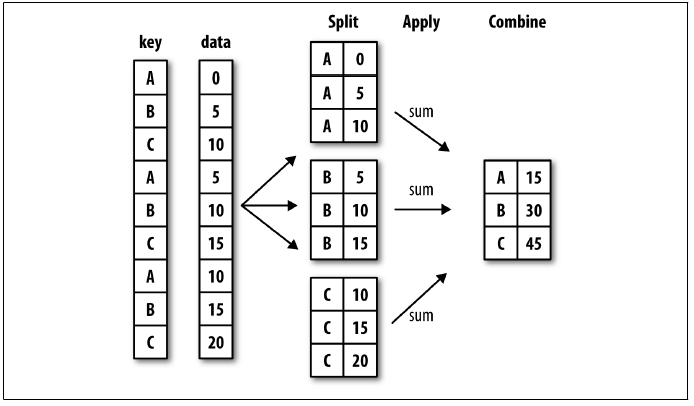

In [48]:
# import fortune1000 data
fortune1000 = pd.read_csv(r'C:\Users\wlj91\Desktop\Python\fortune1000.csv')
fortune1000.head()

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [49]:
# group by sector to create different groups
grouped = fortune1000.groupby(['Sector'])
grouped
# 当我们只使用groupby时，不会显示任何的数据，pandas只会输出一个memory的位置，如下所示。只有当我们 apply aggregation function时才会
# 显示对应的数据

In [50]:
# What is underlying the groupby object?
for sector,data in grouped:
    print(sector)
    print(data)
    
# Pandas已经根据我们所要求的group的dimension，也就是sector将数据先split成了不同的组，并且将对应的数据联系在了一起。

Aerospace & Defense
     Rank                        Company               Sector  \
23     24                         Boeing  Aerospace & Defense   
44     45            United Technologies  Aerospace & Defense   
59     60                Lockheed Martin  Aerospace & Defense   
87     88               General Dynamics  Aerospace & Defense   
117   118               Northrop Grumman  Aerospace & Defense   
119   120                       Raytheon  Aerospace & Defense   
208   209                        Textron  Aerospace & Defense   
244   245             L-3 Communications  Aerospace & Defense   
281   282            Precision Castparts  Aerospace & Defense   
377   378  Huntington Ingalls Industries  Aerospace & Defense   
388   389    Spirit AeroSystems Holdings  Aerospace & Defense   
489   490               Rockwell Collins  Aerospace & Defense   
559   560                    Orbital ATK  Aerospace & Defense   
604   605                  Triumph Group  Aerospace & Defense   
784  

In [51]:
# Has groupby method include all the distinct groups? Let's use something we already learned to verify
# Check how many groups in groupby method
n=0
for sector in grouped:
    n=n+1
print(n)

21


In [52]:
# use value_counts to count how many unique groups in the dataframe
len(fortune1000['Sector'].value_counts())

21

### Aggregation Function in Group By

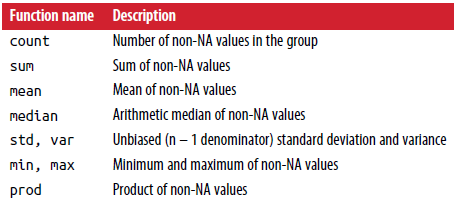

In [53]:
# apply aggregation function on the whole groupby object
grouped.sum()
# pandas会return所有的numerical value column的值

,Rank,Revenue,Profits,Employees
Sector,,,,
Aerospace & Defense,8870,357940,28742,968057
Apparel,8757,95968,8236,346397
Business Services,31074,272195,28227,1361050
Chemicals,15928,243897,22628,463651
Energy,62199,1517809,-73447,1188927
Engineering & Construction,15147,153983,5304,406708
Financials,63566,2217159,260209,3359948
Food and Drug Stores,6429,483769,16759,1395398
"Food, Beverages & Tobacco",18629,555967,51417,1211632


In [54]:
# I only want to see the total revenue and profit
grouped[['Revenue','Profits']].sum()

,Revenue,Profits
Sector,,
Aerospace & Defense,357940,28742
Apparel,95968,8236
Business Services,272195,28227
Chemicals,243897,22628
Energy,1517809,-73447
Engineering & Construction,153983,5304
Financials,2217159,260209
Food and Drug Stores,483769,16759
"Food, Beverages & Tobacco",555967,51417


In [55]:
# What if I only want to see the revenue and profits for sector Technology and Apparel?
grouped[['Revenue','Profits']].sum().loc[['Technology','Apparel']]
# After aggregation function applied, the result is still a dataframe, we can use loc to extract the data we want

,Revenue,Profits
Sector,,
Technology,1377600,180473
Apparel,95968,8236


### Apply different aggregation function

In [56]:
grouped.agg(['sum','mean','count'])

C:\Users\wlj91\AppData\Local\Temp\ipykernel_716\147192430.py:1: FutureWarning: ['Company', 'Industry', 'Location'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(['sum','mean','count'])


Rank                    Revenue                \
                                sum        mean count      sum          mean   
Sector                                                                         
Aerospace & Defense            8870  443.500000    20   357940  17897.000000   
Apparel                        8757  583.800000    15    95968   6397.866667   
Business Services             31074  609.294118    51   272195   5337.156863   
Chemicals                     15928  530.933333    30   243897   8129.900000   
Energy                        62199  509.827869   122  1517809  12441.057377   
Engineering & Construction    15147  582.576923    26   153983   5922.423077   
Financials                    63566  457.309353   139  2217159  15950.784173   
Food and Drug Stores           6429  428.600000    15   483769  32251.266667   
Food, Beverages & Tobacco     18629  433.232558    43   555967  12929.465116   
Health Care                   31770  423.600000    75  1614707  21529.426667   
Hotels, Resturants & Leisure  14039  561.560000    25   169546   6781.840000   
Household Products            15749  562.464286    28   234737   8383.464286   
Industrials                   26988  586.695652    46   497581  10816.978261   
Materials                     23343  542.860465    43   259145   6026.627907   
Media                         13976  559.040000    25   220764   8830.560000   
Motor Vehicles & Parts        11408  475.333333    24   482540  20105.833333   
Retailing                     35651  445.637500    80  1465076  18313.450000   
Technology                    56902  557.862745   102  1377600  13505.882353   
Telecommunications             4877  325.133333    15   461834  30788.933333   
Transportation                18349  509.694444    36   408508  11347.444444   
Wholesalers                   16845  421.125000    40   444800  11120.000000   

                                   Profits                    Employees  \
                             count     sum         mean count       sum   
Sector                                                                    
Aerospace & Defense             20   28742  1437.100000    20    968057   
Apparel                         15    8236   549.066667    15    346397   
Business Services               51   28227   553.470588    51   1361050   
Chemicals                       30   22628   754.266667    30    463651   
Energy                         122  -73447  -602.024590   122   1188927   
Engineering & Construction      26    5304   204.000000    26    406708   
Financials                     139  260209  1872.007194   139   3359948   
Food and Drug Stores            15   16759  1117.266667    15   1395398   
Food, Beverages & Tobacco       43   51417  1195.744186    43   1211632   
Health Care                     75  106114  1414.853333    75   2678289   
Hotels, Resturants & Leisure    25   20697   827.880000    25   2484245   
Household Products              28   14428   515.285714    28    646038   
Industrials                     46   20764   451.391304    46   1545229   
Materials                       43    4428   102.976744    43    638123   
Media                           25   24347   973.880000    25    550314   
Motor Vehicles & Parts          24   25898  1079.083333    24   1082560   
Retailing                       80   47830   597.875000    80   6227629   
Technology                     102  180473  1769.343137   102   3578949   
Telecommunications              15   48637  3242.466667    15    832468   
Transportation                  36   44169  1226.916667    36   1536793   
Wholesalers                     40    8233   205.825000    40    525597   

                                                  
                                      mean count  
Sector                                            
Aerospace & Defense           48402.850000    20  
Apparel                       23093.133333    15  
Business Services             26687.254902    51  
Che

In [57]:
# Use dictionary to apply different aggregation function
group_agg= grouped.agg({"Revenue" : ["sum", "mean"],
             "Profits" : "sum",
              "Employees" : "mean"})
group_agg

Revenue               Profits     Employees
                                  sum          mean     sum          mean
Sector                                                                   
Aerospace & Defense            357940  17897.000000   28742  48402.850000
Apparel                         95968   6397.866667    8236  23093.133333
Business Services              272195   5337.156863   28227  26687.254902
Chemicals                      243897   8129.900000   22628  15455.033333
Energy                        1517809  12441.057377  -73447   9745.303279
Engineering & Construction     153983   5922.423077    5304  15642.615385
Financials                    2217159  15950.784173  260209  24172.287770
Food and Drug Stores           483769  32251.266667   16759  93026.533333
Food, Beverages & Tobacco      555967  12929.465116   51417  28177.488372
Health Care                   1614707  21529.426667  106114  35710.520000
Hotels, Resturants & Leisure   169546   6781.840000   20697  99369.800000
Household Products             234737   8383.464286   14428  23072.785714
Industrials                    497581  10816.978261   20764  33591.934783
Materials                      259145   6026.627907    4428  14840.069767
Media                          220764   8830.560000   24347  22012.560000
Motor Vehicles & Parts         482540  20105.833333   25898  45106.666667
Retailing                     1465076  18313.450000   47830  77845.362500
Technology                    1377600  13505.882353  180473  35087.735294
Telecommunications             461834  30788.933333   48637  55497.866667
Transportation                 408508  11347.444444   44169  42688.694444
Wholesalers                    444800  11120.000000    8233  13139.925000

### MultiIndex

In [58]:
# 当在group by以后使用agg method 去apply一种或多种aggregation function的时候，dataframe有了multiindex，也就是多个level的index
group_agg.columns

MultiIndex([(  'Revenue',  'sum'),
            (  'Revenue', 'mean'),
            (  'Profits',  'sum'),
            ('Employees', 'mean')],
           )

In [59]:
# 此时当我们想要query某一列或者某一个具体的值时，同样需要传入multiindex
# I want only the sum of revenue for each sector
group_agg['Revenue','sum']

Sector
Aerospace & Defense              357940
Apparel                           95968
Business Services                272195
Chemicals                        243897
Energy                          1517809
Engineering & Construction       153983
Financials                      2217159
Food and Drug Stores             483769
Food, Beverages & Tobacco        555967
Health Care                     1614707
Hotels, Resturants & Leisure     169546
Household Products               234737
Industrials                      497581
Materials                        259145
Media                            220764
Motor Vehicles & Parts           482540
Retailing                       1465076
Technology                      1377600
Telecommunications               461834
Transportation                   408508
Wholesalers                      444800
Name: (Revenue, sum), dtype: int64

In [60]:
# I only want to know the total porfits for Financial sector
group_agg.loc['Financials',('Profits','sum')]
# 注意('Profits','sum') 的括号不可以漏，否则报错，因为multiindex的组成元素为tuple

260209

In [61]:
# if do not specify the lowest level column name, it will return a dataframe
group_agg['Revenue']

,sum,mean
Sector,,
Aerospace & Defense,357940,17897.000000
Apparel,95968,6397.866667
Business Services,272195,5337.156863
Chemicals,243897,8129.900000
Energy,1517809,12441.057377
Engineering & Construction,153983,5922.423077
Financials,2217159,15950.784173
Food and Drug Stores,483769,32251.266667
"Food, Beverages & Tobacco",555967,12929.465116


## Pivot and reshape the dataframe
- pd.pivot() 适用于将行转化为列 （即将很长的dataframe变为很宽的dataframe）
- df.melt() 适用于将列转化为行 （即将很宽的dataframe变为很长的dataframe）

### df.melt(id_vars, value_vars, var_name, value_name='value')
- 作用类似于unpivot，将已经pivot后变成列的value再次转化为row
- id_vars指df中哪一列作为identifier，类似于index
- values_vars指df中哪一列用来populate value的source
- var_name指df中被转化的column的name，如果不指定，则默认为'variable'
- value_name指用什么名字给有value的column命名，不指定，则默认为'value'

In [62]:
# extract the subset of fortune1000 to illustrate
apparel = fortune1000.loc[fortune1000['Sector'] == 'Apparel']
apparel

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees
90,91,Nike,Apparel,Apparel,"Beaverton, OR",30601,3273,62600
230,231,VF,Apparel,Apparel,"Greensboro, NC",12377,1232,64000
339,340,PVH,Apparel,Apparel,"New York, NY",8020,572,26200
353,354,Ralph Lauren,Apparel,Apparel,"New York, NY",7620,702,20000
447,448,Hanesbrands,Apparel,Apparel,"Winston-Salem, NC",5732,429,65300
546,547,Levi Strauss,Apparel,Apparel,"San Francisco, CA",4495,209,12500
574,575,Coach,Apparel,Apparel,"New York, NY",4192,402,12950
596,597,Under Armour,Apparel,Apparel,"Baltimore, MD",3963,233,9600
682,683,Fossil Group,Apparel,Apparel,"Richardson, TX",3229,221,15100
694,695,Skechers U.S.A.,Apparel,Apparel,"Manhattan Beach, CA",3159,232,6400


In [63]:
apparel_new = apparel.melt(id_vars = ['Company','Location'],value_vars=['Revenue','Profits'],var_name = 'Metrics',value_name = 'Metrics Value')
apparel_new

,Company,Location,Metrics,Metrics Value
0,Nike,"Beaverton, OR",Revenue,30601
1,VF,"Greensboro, NC",Revenue,12377
2,PVH,"New York, NY",Revenue,8020
3,Ralph Lauren,"New York, NY",Revenue,7620
4,Hanesbrands,"Winston-Salem, NC",Revenue,5732
5,Levi Strauss,"San Francisco, CA",Revenue,4495
6,Coach,"New York, NY",Revenue,4192
7,Under Armour,"Baltimore, MD",Revenue,3963
8,Fossil Group,"Richardson, TX",Revenue,3229
9,Skechers U.S.A.,"Manhattan Beach, CA",Revenue,3159


### pd.pivot(index, columns, values)
- 将行转为列，可以看作是melt的逆运算
- index指用df中的哪一列作为新的index
- columns指用df中的哪一列作为新的columns
- values指用df中的哪一列作为新的values

In [64]:
# 将刚刚melt的apparel再次转化为原来的样子
apparel1 = apparel_new.pivot(index = ['Company','Location'], columns ='Metrics', values = 'Metrics Value')
apparel1

,Metrics,Profits,Revenue
Company,Location,,
Carter’s,"Atlanta, GA",238,3014
Coach,"New York, NY",402,4192
Columbia Sportswear,"Portland, OR",174,2326
Fossil Group,"Richardson, TX",221,3229
G-III Apparel Group,"New York, NY",114,2344
Guess,"Los Angeles, CA",82,2204
Hanesbrands,"Winston-Salem, NC",429,5732
Levi Strauss,"San Francisco, CA",209,4495
Nike,"Beaverton, OR",3273,30601


In [65]:
apparel1.columns #注意metrics是column这个object的名字，里面包含了2列，profits 和 Revenue

Index(['Profits', 'Revenue'], dtype='object', name='Metrics')

In [66]:
apparel1.index

MultiIndex([(            'Carter’s',         'Atlanta, GA'),
            (               'Coach',        'New York, NY'),
            ( 'Columbia Sportswear',        'Portland, OR'),
            (        'Fossil Group',      'Richardson, TX'),
            ( 'G-III Apparel Group',        'New York, NY'),
            (               'Guess',     'Los Angeles, CA'),
            (         'Hanesbrands',   'Winston-Salem, NC'),
            (        'Levi Strauss',   'San Francisco, CA'),
            (                'Nike',       'Beaverton, OR'),
            (                 'PVH',        'New York, NY'),
            (        'Ralph Lauren',        'New York, NY'),
            (     'Skechers U.S.A.', 'Manhattan Beach, CA'),
            (        'Under Armour',       'Baltimore, MD'),
            (                  'VF',      'Greensboro, NC'),
            ('Wolverine World Wide',        'Rockford, MI')],
           names=['Company', 'Location'])

### reset_index() and set_index()

In [67]:
# Use reset_index() to convert index to each column
apparel2 = apparel1.reset_index()
apparel2

Metrics,Company,Location,Profits,Revenue
0,Carter’s,"Atlanta, GA",238,3014
1,Coach,"New York, NY",402,4192
2,Columbia Sportswear,"Portland, OR",174,2326
3,Fossil Group,"Richardson, TX",221,3229
4,G-III Apparel Group,"New York, NY",114,2344
5,Guess,"Los Angeles, CA",82,2204
6,Hanesbrands,"Winston-Salem, NC",429,5732
7,Levi Strauss,"San Francisco, CA",209,4495
8,Nike,"Beaverton, OR",3273,30601
9,PVH,"New York, NY",572,8020


In [68]:
apparel2 = apparel2.set_index('Company')
#apparel2.set_index('Company',inplace = True)同样可以在原始df中生效
apparel2

Metrics,Location,Profits,Revenue
Company,,,
Carter’s,"Atlanta, GA",238,3014
Coach,"New York, NY",402,4192
Columbia Sportswear,"Portland, OR",174,2326
Fossil Group,"Richardson, TX",221,3229
G-III Apparel Group,"New York, NY",114,2344
Guess,"Los Angeles, CA",82,2204
Hanesbrands,"Winston-Salem, NC",429,5732
Levi Strauss,"San Francisco, CA",209,4495
Nike,"Beaverton, OR",3273,30601


In [69]:
# remove the column name if you do not want to see them
apparel2.columns.name = None
apparel2

,Location,Profits,Revenue
Company,,,
Carter’s,"Atlanta, GA",238,3014
Coach,"New York, NY",402,4192
Columbia Sportswear,"Portland, OR",174,2326
Fossil Group,"Richardson, TX",221,3229
G-III Apparel Group,"New York, NY",114,2344
Guess,"Los Angeles, CA",82,2204
Hanesbrands,"Winston-Salem, NC",429,5732
Levi Strauss,"San Francisco, CA",209,4495
Nike,"Beaverton, OR",3273,30601


## Merge and Concat of multiple dataframes

- pandas.merge connects rows in DataFrames based on one or more keys. This
  will be familiar to users of SQL or other relational databases, as it implements
  database join operations.
- pandas.concat concatenates or “stacks” together objects along an axis.
- pandas同样提供了join method，但是其不如merge更灵活，推荐使用merge

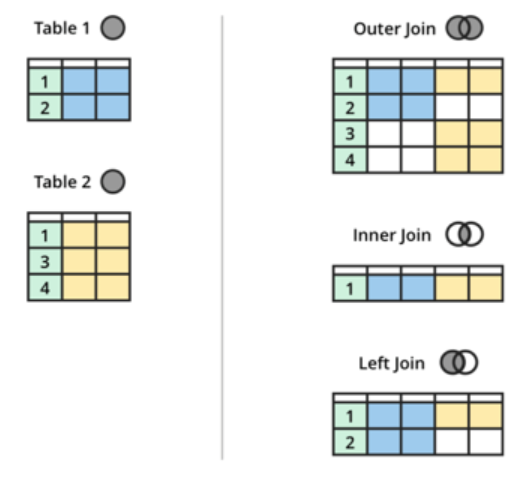

In [70]:
# create some simple dataframes to illustrate the concept
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],'data2': range(3)})

In [71]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [72]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


### pd.merge argument summary

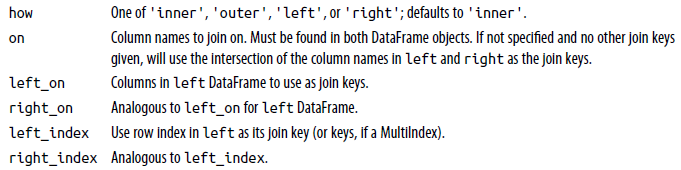

In [73]:
# inner join
df1.merge(df2,how = 'inner',on = 'key')
# how = 'inner' 可以省略
# pd.merge(df1,df2,how = 'inner',on = 'key')也可以

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [74]:
# left join
df1.merge(df2,how = 'left',on = 'key')

,key,data1,data2
0,b,0,1.0
1,b,1,1.0
2,a,2,0.0
3,c,3,NaN
4,a,4,0.0
5,a,5,0.0
6,b,6,1.0


In [75]:
# right join
df1.merge(df2,how = 'right',on = 'key')

,key,data1,data2
0,a,2.0,0
1,a,4.0,0
2,a,5.0,0
3,b,0.0,1
4,b,1.0,1
5,b,6.0,1
6,d,NaN,2


In [76]:
# The above is same as left join starting with df2, but the order of the columns are different
df2.merge(df1,how = 'left',on = 'key')

,key,data2,data1
0,a,0,2.0
1,a,0,4.0
2,a,0,5.0
3,b,1,0.0
4,b,1,1.0
5,b,1,6.0
6,d,2,NaN


In [77]:
# outer join
df1.merge(df2,how = 'outer',on = 'key')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


#### on 适用于2个df在merge时有相同的column name

### Merge using index

In [78]:
# Review the sample df to more conveniently compare
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [79]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [80]:
df2.merge(df1,how = 'inner',left_index = True,right_index = True)

,key_x,data2,key_y,data1
0,a,0,b,0
1,b,1,b,1
2,d,2,a,2


In [81]:
df1.merge(df2,how = 'left',left_index = True,right_index = True,suffixes = ['_1','_2'])
#当我们merge时，如果结果中有2列名字完全一样的column， pandas默认会加入‘_x','_y'来加以区分，可以通过suffixes来控制

,key_1,data1,key_2,data2
0,b,0,a,0.0
1,b,1,b,1.0
2,a,2,d,2.0
3,c,3,NaN,NaN
4,a,4,NaN,NaN
5,a,5,NaN,NaN
6,b,6,NaN,NaN


#### right_index, left_index适用于merge2个dataframes时用index作为key

### Using 2 columns with different names to join

In [82]:
# What if I want to join using data1 column from df1 and data2 column from df2?
# change the column name key from df1 to key1
df1.rename(columns={'key':'key1'},inplace = True)

In [83]:
df1.merge(df2,how = 'left',left_on = 'key1',right_on = 'key')

,key1,data1,key,data2
0,b,0,b,1.0
1,b,1,b,1.0
2,a,2,a,0.0
3,c,3,NaN,NaN
4,a,4,a,0.0
5,a,5,a,0.0
6,b,6,b,1.0


In [84]:
df1.merge(df2,how = 'inner',left_on = 'key1',right_on = 'key')

,key1,data1,key,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


#### left_on,right_on适用于2个df join时，key column的名字不一样

### Summary
- on适用于join key是同一个column name
- right_index，left_index适用于join key是2个df的index
- right_on,left_on适用于join key是2个df的不同名字的column
- 同理，如果想要join 2个df, 但是join key是df1的index和df2的某一个column name,可以使用
    - df1.merge(df2,how = 'inner',left_index = True,right_on = 'key')

## pd.concat
- 适用于想将多个df简单按照垂直或者水平的方向进行叠加
- 必须以pd.concat开头，不可以为df.concat开头
- 传入一个list，里面包含了想要拼接在一起的df
- axis这个argument控制是横向还是水平拼接，默认为axis=0，垂直拼接。想要水平拼接，传入axis=1
- join argument有2个选项，默认为outer，就是返回所有的行或列。如果只想返回shared的行或列，传入join = ‘inner’ 即可
- ignore_index控制拼接以后的df的index是按照原来的，还是重新按照0，1，2...编排

In [85]:
df1

,key1,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [86]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [87]:
pd.concat([df1,df2])
# 由于没有传入axis，默认为0，即垂直拼接，所有的2个df的columns都会出现，如果没有值，则用NA代替。
# index保留了原始的index

,key1,data1,key,data2
0,b,0.0,NaN,NaN
1,b,1.0,NaN,NaN
2,a,2.0,NaN,NaN
3,c,3.0,NaN,NaN
4,a,4.0,NaN,NaN
5,a,5.0,NaN,NaN
6,b,6.0,NaN,NaN
0,NaN,NaN,a,0.0
1,NaN,NaN,b,1.0
2,NaN,NaN,d,2.0


In [88]:
pd.concat([df1,df2],join = 'inner',axis = 1)

,key1,data1,key,data2
0,b,0,a,0
1,b,1,b,1
2,a,2,d,2


In [89]:
pd.concat([df1,df2],axis = 1)

,key1,data1,key,data2
0,b,0,a,0.0
1,b,1,b,1.0
2,a,2,d,2.0
3,c,3,NaN,NaN
4,a,4,NaN,NaN
5,a,5,NaN,NaN
6,b,6,NaN,NaN


In [90]:
# rename column name key1 to key for df1 to check what concat looks like if some column names are shared between 2 dataframes
df1.rename(columns = {'key1':'key'},inplace = True)
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [91]:
pd.concat([df1,df2],ignore_index = True)

,key,data1,data2
0,b,0.0,NaN
1,b,1.0,NaN
2,a,2.0,NaN
3,c,3.0,NaN
4,a,4.0,NaN
5,a,5.0,NaN
6,b,6.0,NaN
7,a,NaN,0.0
8,b,NaN,1.0
9,d,NaN,2.0


In [92]:
pd.concat([df1,df2],ignore_index = True,join = 'inner')
#由于加入了join = ‘inner’，且axis = 0的情况下，结果只会出现shared columns

,key
0,b
1,b
2,a
3,c
4,a
5,a
6,b
7,a
8,b
9,d


#### Save file

In [93]:
df1.to_csv('test_file_df1')